In [220]:
import pandas as pd
import numpy as np
import os
import src.features.feature_engineering_1 as feng

In [221]:
# Récupération des données 
years = ['2016', '2017', '2018', '2019']
df = feng.get_all_season_data(years)

In [222]:
# Ajout des nouvelles caractéristiques
df = feng.add_new_features(df)

$$ \text{Premier modèle de régression} $$

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.calibration import calibration_curve, CalibrationDisplay

In [224]:
def split_data(df: pd.DataFrame, target_feature : list, test_feature : str):
    df = df.copy()

    # Récupération du dataFrame privé de l'ensemble de test
    features = target_feature.copy()
    
    features.append(test_feature)

    df = df[features].dropna()
    

    X_train, X_val, Y_train, Y_val = train_test_split(
        df[target_feature], df[test_feature], test_size = 0.2
    )
    return X_train, X_val, Y_train, Y_val

$$ \textbf{QUESTION 1 :} $$ 

In [256]:
# On entraine un modèle utilisant seulement la caractéristique 'distance_to_net'
target_feature = ['distance_to_net']
test_feature = 'is_goal'
X_train, X_val, Y_train, Y_val = split_data(df, target_feature, test_feature)

In [257]:
# On définit notre classificateur de régression logistique
clf_1 = LogisticRegression()

# Entrainement du modèle
clf_1.fit(X_train, Y_train)

# On effectue les prédictions sur l'ensemble de validation
y_pred = clf_1.predict(X_val)
Y_pred_proba = clf_1.predict_proba(X_val)[:,1]

# On calcule la précision du modèle 
accuracy_score(y_pred, Y_val)

0.9044985870312381

$$\text{Courbes ROC et AUC} $$

In [258]:
import matplotlib.pyplot as plt

In [259]:
def plot_roc_curve(Y_val : pd.Series, Y_pred_proba : np.ndarray):
    fpr_model_1, tpr_model_1, _ = roc_curve(Y_val, Y_pred_proba)    
    auc_score = roc_auc_score(Y_val, Y_pred_proba)

    plt.plot(fpr_model_1,tpr_model_1, label = f"Model 1, AUC = {round(auc_score,2)}")
    plt.plot([0,1], [0,1], label = 'Baseline')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('True positive Rate (TPR)')
    plt.ylabel('False positive Rate (FPR)')
    plt.title('ROC curve')
    plt.grid()
    plt.legend()

    plt.show()

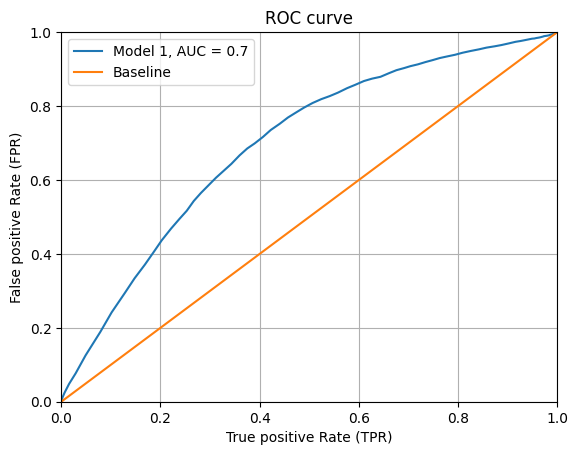

In [260]:
plot_roc_curve(Y_val, Y_pred_proba)

$$ \text{Taux de buts en fonction du centile de la probabilité de tir}$$ 

$$ \text{Courbe de calibration} $$

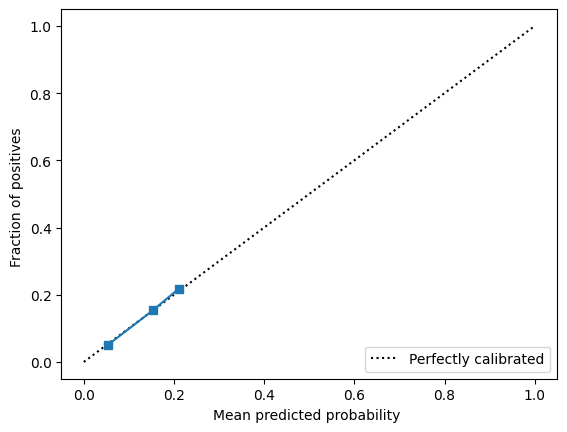

In [252]:
prob_true, prob_pred = calibration_curve(Y_val, Y_pred_proba, n_bins = 10)
disp = CalibrationDisplay(prob_true, prob_pred, Y_pred_proba)
disp.plot()

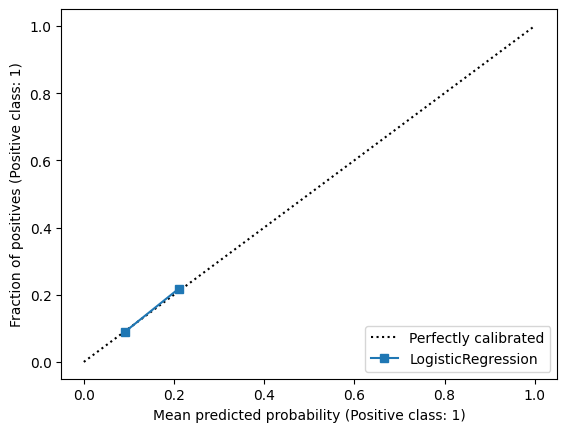

In [254]:
disp = CalibrationDisplay.from_estimator(clf_1, X_val, Y_val)
plt.show()

$$ \textbf{Régression logistique sur l'angle de tir :} $$ 

In [270]:
# On sépare nos données entre ensemble d'entrainement et ensemble de validation
X_train, X_val, Y_train, Y_val = split_data(df, ['shot_angle'], 'is_goal')

# On définit un deuxième classificateur de régression logistique
clf_2 = LogisticRegression()

# Entrainement du modèle sur la caractéristique 'shot_angle'
clf_2.fit(X_train,Y_train)

# On effectue les prédictions sur l'ensemble de validation
Y_pred = clf_2.predict(X_val)
Y_pred_proba = clf_2.predict_proba(X_val)[:,1]

# On calcule la précision du modèle
accuracy_score(Y_pred, Y_val)

0.9048346444665089

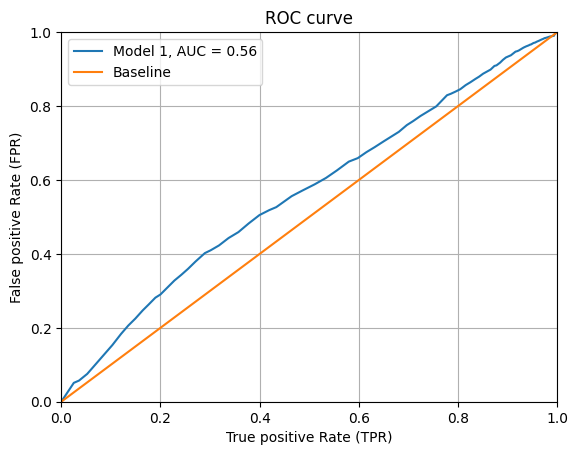

In [271]:
plot_roc_curve(Y_val, Y_pred_proba)

$$ \text{Régression logistique sur la distance et l'angle de tir} $$ 

In [274]:
X_train, X_val, Y_train, Y_val = split_data(df, ['distance_to_net', 'shot_angle'], 'is_goal')

# On définit un troisième classificateur de régression logistique  
clf_3 = LogisticRegression()

# Entrainement du modèle sur les deux caractéristiques
clf_3.fit(X_train, Y_train)

# On effectue les prédictions sur l'ensemble de validation
Y_pred = clf_3.predict(X_val)
Y_pred_proba = clf_3.predict_proba(X_val)[:,1]

# On calcule la précision du modèle
accuracy_score(Y_pred, Y_val)

0.9053692812953487

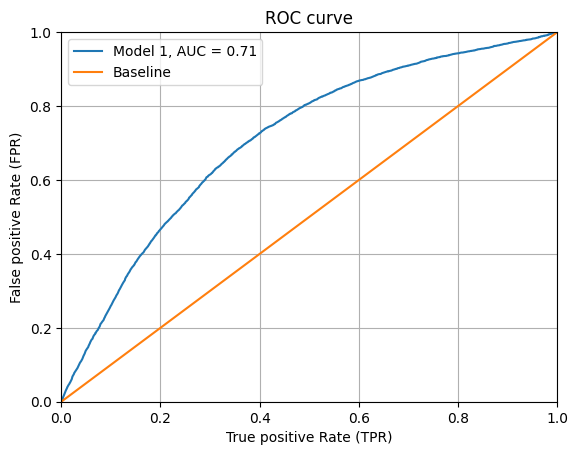

In [275]:
plot_roc_curve(Y_val, Y_pred_proba)